# __Configuration de l'environnement de travail__

## Package

In [1]:
# !pip install scikit-learn plotly
# !pip install plotly -U
# !pip install pandas  missingno matplotlib seaborn plotly

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import missingno as msno
#import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ppscore as pps
import numpy as np
import scipy.stats as stats 
from scipy.stats import chi2_contingency
import sklearn
import joblib

## Folders 

In [3]:
# Définir le répertoire de travail de manière référentielle
def set_working_directory():
   
    # Obtenir le chemin absolu du notebook courant
    notebook_path = os.path.abspath('.')
    
    # Définir le répertoire racine du projet 
    project_root = os.path.dirname(notebook_path)
    
    # Définir les sous-répertoires
    data_dir = os.path.join(project_root, 'Data', 'Raw')
    output_dir = os.path.join(project_root, 'Data', 'Processed')
    pipeline_dir = os.path.join(project_root, 'pipeline')
    
    # Créer les répertoires s'ils n'existent pas
    #os.makedirs(data_dir, exist_ok=True)
    #os.makedirs(output_dir, exist_ok=True)
    
    return {
        'project_root': project_root,
        'data_dir': data_dir,
        'output_dir': output_dir,
        'pipeline_dir' :  pipeline_dir
    }


In [4]:
dirs  = set_working_directory()
print('project_root : ', dirs['project_root'],'data_dir : ', dirs['data_dir'], 'output_dir : ', dirs['output_dir'])

project_root :  c:\Users\LENOVO\Desktop\House_Price_Prediction data_dir :  c:\Users\LENOVO\Desktop\House_Price_Prediction\Data\Raw output_dir :  c:\Users\LENOVO\Desktop\House_Price_Prediction\Data\Processed


# __Data Understanding__

## Chargement des données et traitements préliminaires 

En lisant le dictionnaires des données, on constate que certaines variables ont la modalité 'NA' qui par défaut est considéré comme valeur manquante pandas, les paramètres par défaut sont modifiés à l'importation de manière à ce que les valeurs considérés par pandas comme manquantes soient entièrement controlées en perpective des traitements.

In [5]:
data_file_path = os.path.join(dirs['data_dir'], 'train.csv')
data = pd.read_csv(data_file_path, na_values=['NA', 'N/A', 'null', ''],keep_default_na=False)
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
# taille de la base :
data.shape

# type des variables
data.info()

# Définir la variable Id comme identifiant 
data = data.set_index('Id')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Dans cette partie nous identifions toutes les variables qui ont des valeurs manquantes en vue de traitement ultérieures même si c'est valeurs manquantes ne se retrouve pas dans les données d'entrainement.

<Axes: >

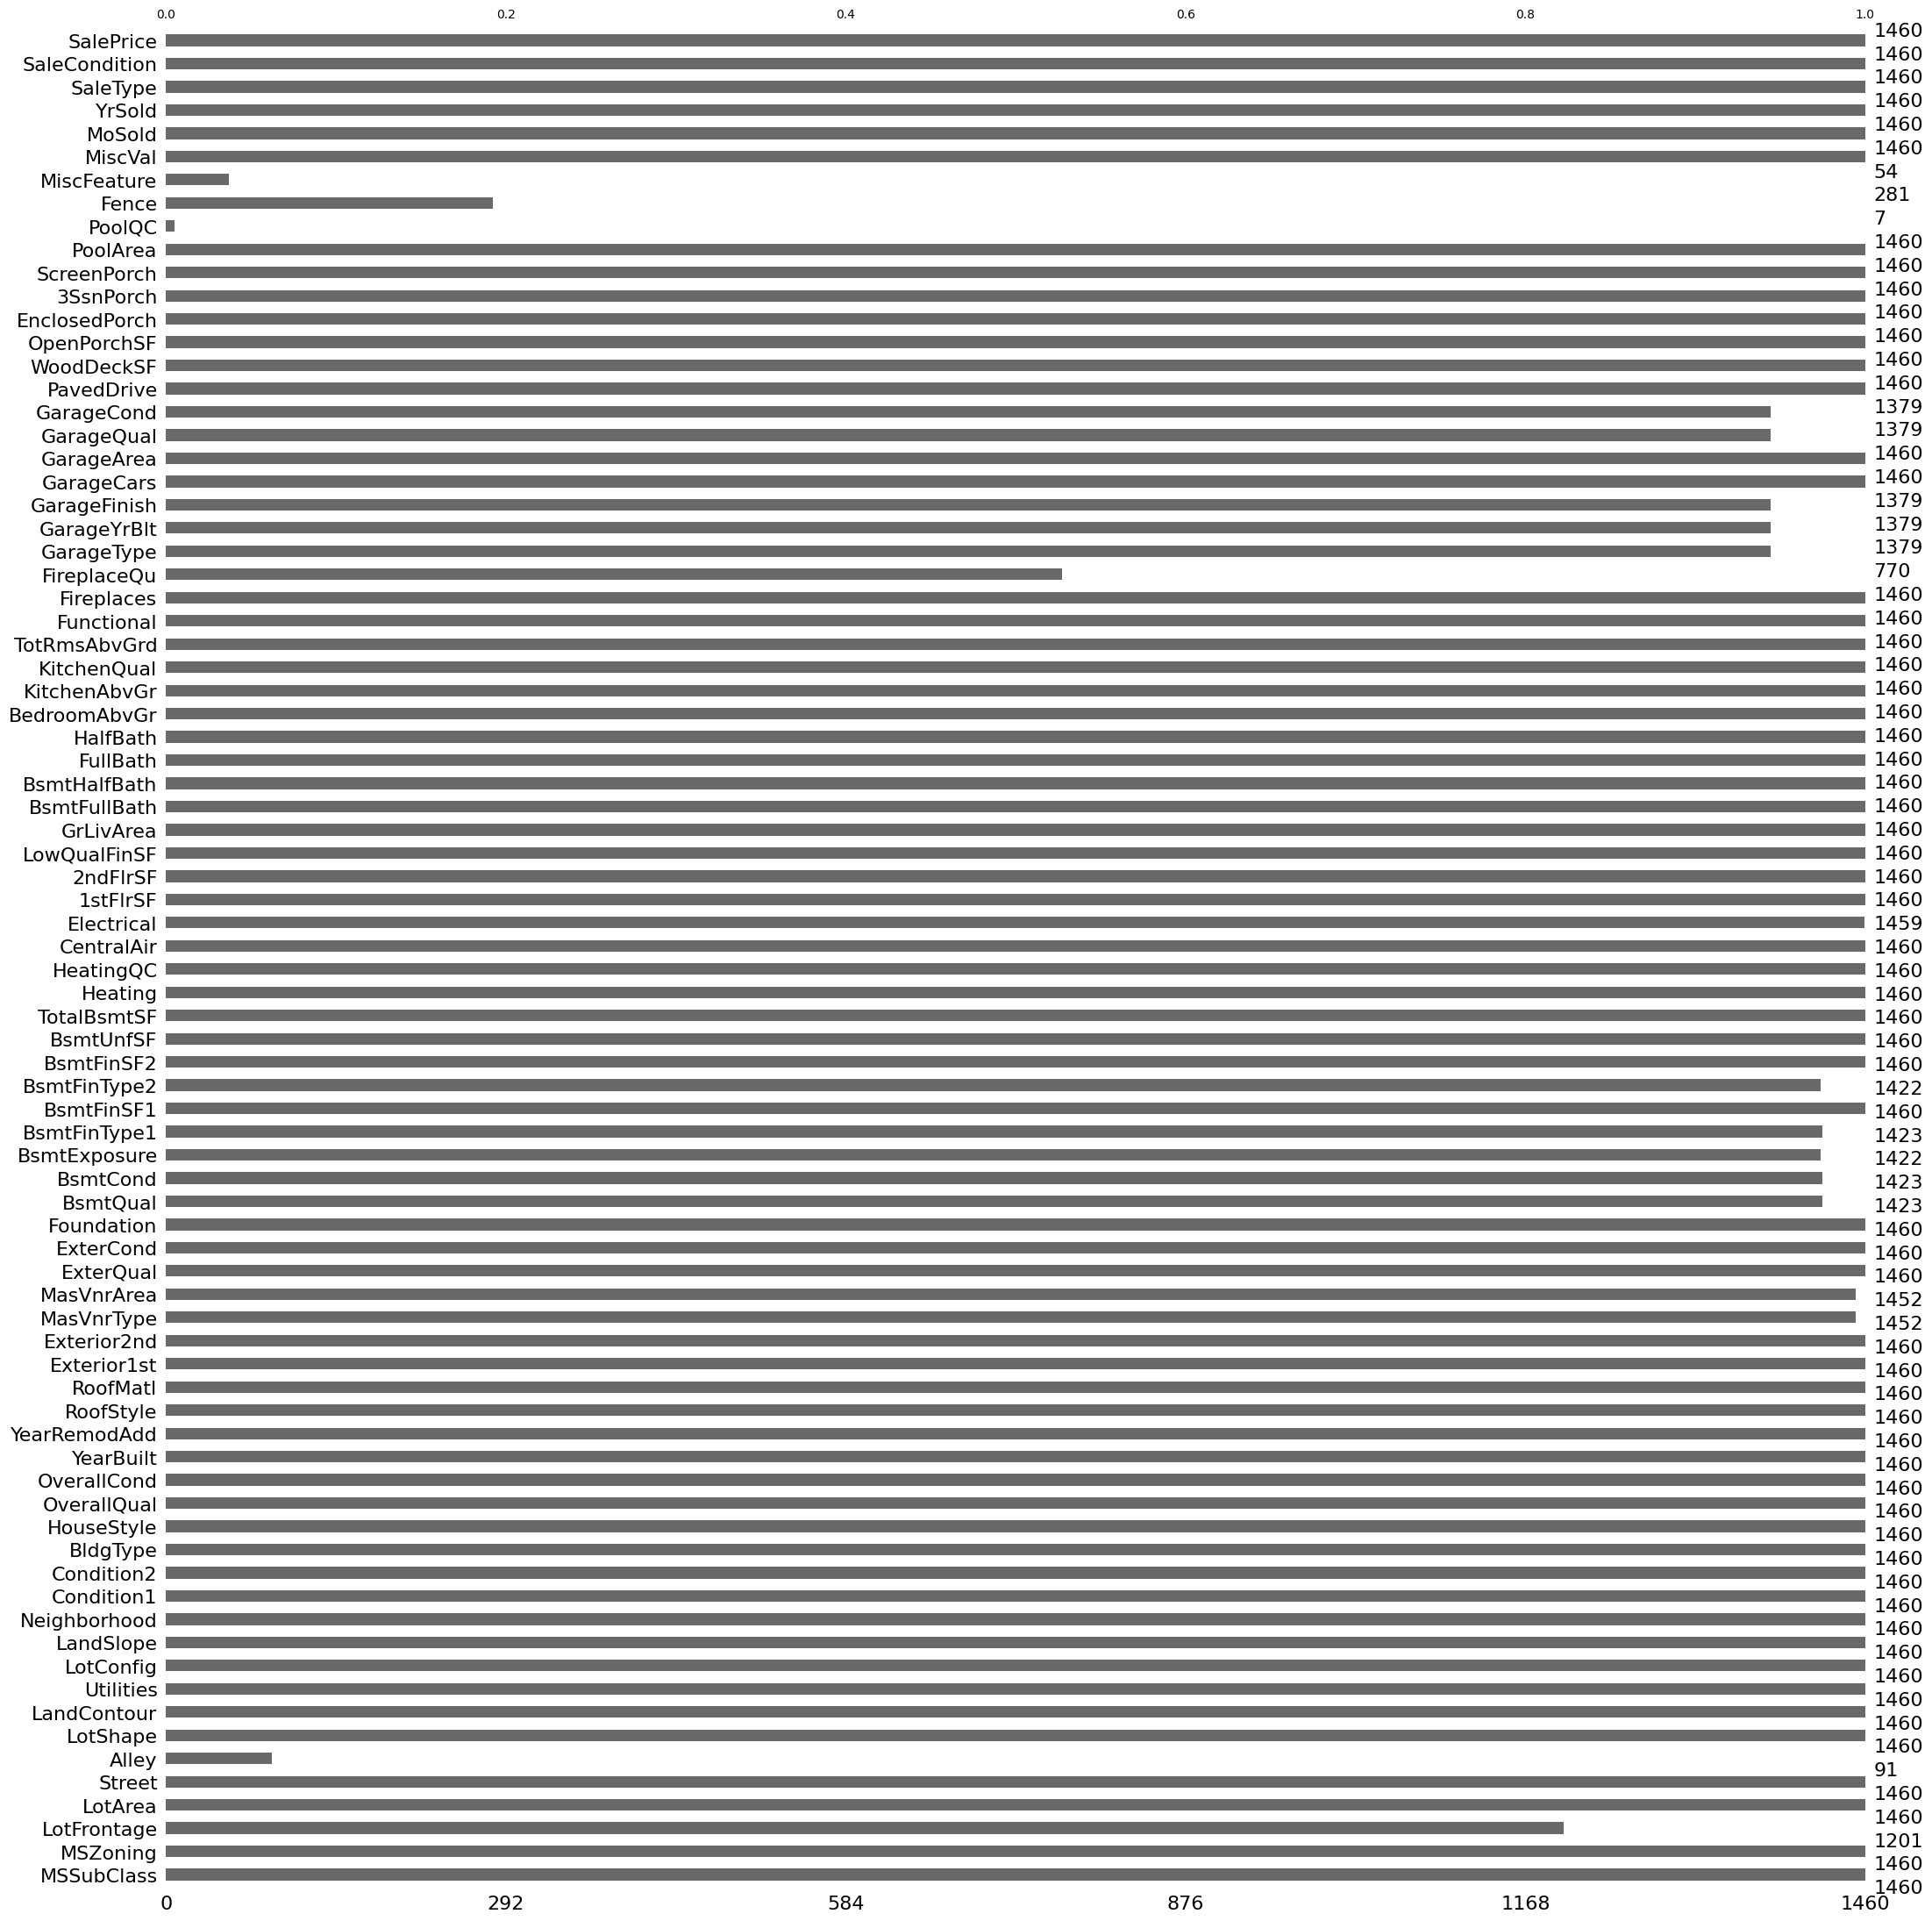

In [7]:
# Détection dees valeurs manquantes 
msno.bar(data,filter="top")

In [8]:
# Collecte des variables ayant des valeurs manquantes 
NA_var = [col for col in data.columns if data[col].isna().any()]

# Nombre de valeurs manquantes pour les variables concernées
NA_var_counts = data.isna().sum()
print(NA_var_counts[NA_var_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


## formatage des variables selon leurs types 

Cette partie gère et uniformise les types des variables. D'abord On y définie en se basant sur le dictionnaire des données les variables les variables ordinales numériques (o_num), ordinales non numériques (o_n_num), non ordinales (n_o), continues (cont), binaires (boul). Ensuite lses variables sont formatés pour s'assuer qu'elles corresponent au type attendu.

In [9]:
o_num = [
    "OverallQual", "OverallCond",
    

    "MSSubClass"
]
o_n_num = ['LandSlope',
                       "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC","BsmtExposure","BsmtFinType1", "BsmtFinType2",
                       "GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence",
                       "Functional","KitchenQual","HouseStyle","MSZoning"]
n_o = ['LotShape', 'Street', 'Alley', 'Neighborhood','Condition1', 'Condition2','LandContour','Utilities', 'LotConfig','SaleType', 'SaleCondition',
               "RoofMatl", "Foundation", "Heating", "Electrical","MasVnrType",
               "GarageType","Exterior1st","Exterior2nd",
               "MiscFeature","RoofStyle","BldgType"]
cont = ['LotFrontage', 'LotArea',
        "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
        "GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea",
        "TotRmsAbvGrd", "KitchenAbvGr","BedroomAbvGr","HalfBath","FullBath", "BsmtHalfBath","BsmtFullBath","GrLivArea","TotalBsmtSF"]
boul = [
    "CentralAir"
]
dat = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold',
       
       "GarageYrBlt"]

Formatage des variables selon leurs typage

In [10]:
# Copie du DataFrame original pour éviter les modifications directes
data_f = data.copy()

# Formatage des variables ordinales numériques
for col in o_num:
    data_f [col] = pd.Categorical(data_f[col])

# Formatage des variables ordinales non numériques
for col in o_n_num:
    data_f [col] = pd.Categorical(data_f[col])

# Formatage des variables non ordinales
for col in n_o:
    data_f [col] = pd.Categorical(data_f[col])

# Formatage des variables continues
for col in cont:
    data_f [col] = data_f [col].astype(float)

# Formatage des variables booléennes
for col in boul:
    data_f [col] = data_f [col].astype(bool)

# Formatage des variables de date
for col in dat:
    data_f [col] = pd.to_datetime(data_f [col])

In [11]:
# Sauvegarde
data_formate_path = os.path.join(dirs['output_dir'], '01_data_formate.csv')

data_f.to_csv(data_formate_path, index=False)

## Visualisation des valeurs abérantes

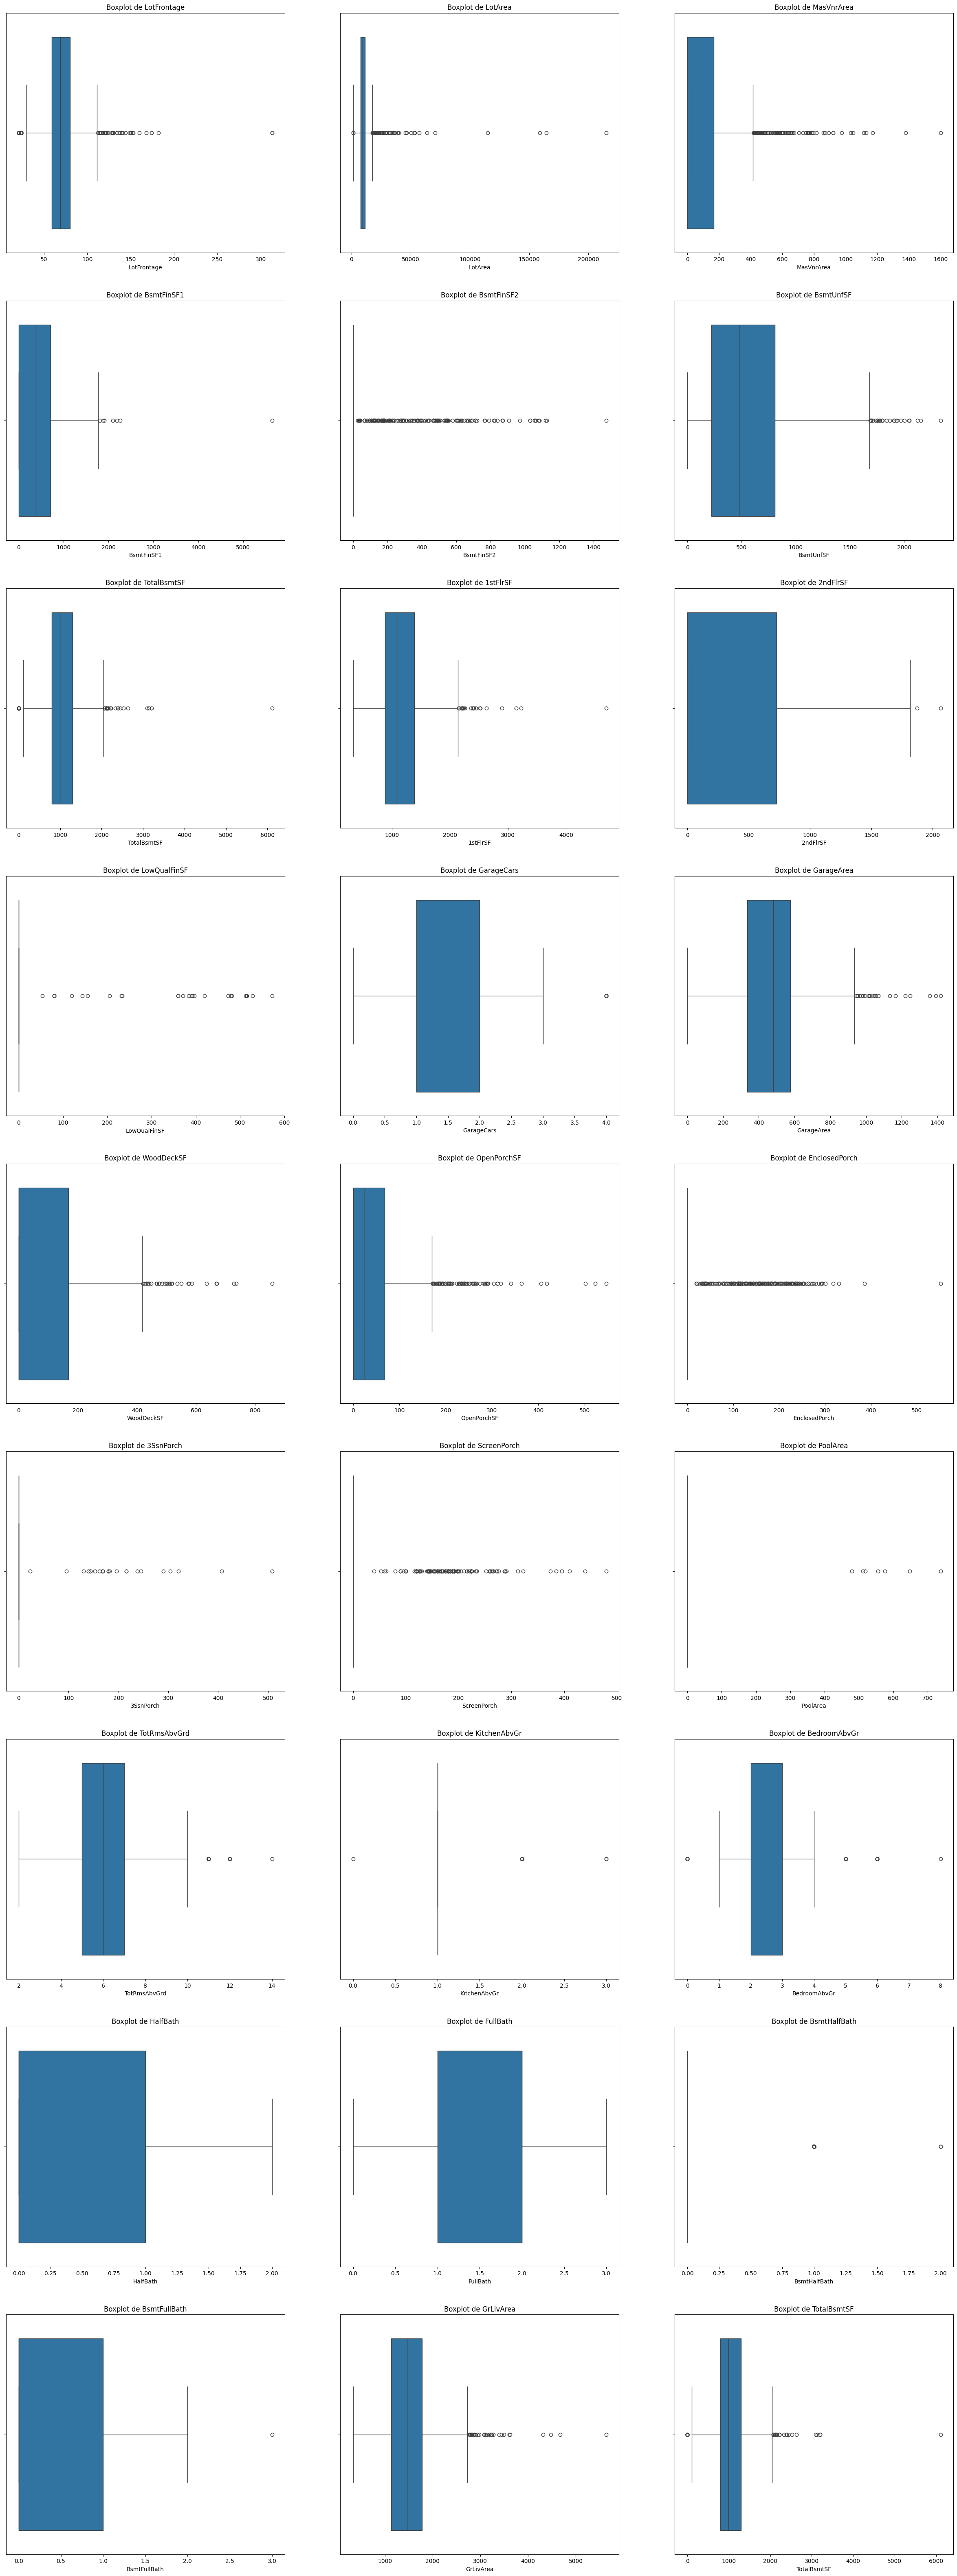

In [12]:
# Définir le nombre de colonnes pour l'affichage 
n_cols = 3

# Calculer le nombre de lignes nécessaires
n_rows = -(-len(cont) // n_cols)  # Division entière en arrondi supérieur

# Créer la figure et les sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 9))

# Aplatir les axes si nécessaire (cas de plusieurs lignes/colonnes)
axes = axes.flatten()


# Tracer les boxplots
for i, var in enumerate(cont):
    sns.boxplot(data=data, x=var, ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

# Cacher les axes inutilisés si le nombre de graphiques est inférieur au total d'axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

Nous constatons la présence de valeurs extrèmes, notamment pour presque toutes les variables. Mais au regard de la base, l'on se rend compte qu'il s'agit de valeurs extrèmes qui s'expliquent par la particularité de la variable elle même.  
Par exemple, les valeurs extrèmes de **BsmtFullBath** et de **BsmtHalfBath** qui représentent respectivement le nombre de salle de bain et de demi-salle de bain au sous sol, se justifient par le fait qu'il y a peu de maisons qui ont plusieurs salles de bain ou demi-salles de bain dans leurs sous-sol. 
Les valeurs extrèmes des autres variables peuvent au regard de la base trouver également des justifications plausibles. Par conséquent ces valeurs extrêmes seront laissées comme tel

# __Data preparation__
Dans cette partie les données sont traités de manières à les rendre propre et à les préparé à entrer dans les modèles de machine learning 

## Séparation des données 
D'abord les données train et test sont séparés pour éviter une fuite des données (leakage). Les traitement seront ensuite fait sur le train puis mémorisés par un pipeline (3 ième partie) qui les repliquera sur les données test.
A la fin de cette partie les varaibles qui devront entrés dans le modèle ainsi que les traitements particuliers qu'elles devront subir seront explicités 

In [13]:
data = pd.read_csv(data_formate_path, na_values=['NA', 'N/A', 'null', ''],keep_default_na=False)

In [14]:
# Fonction pour charger et séparer les données
def prepare_data(data, test_size=0.2, random_state=42):

    # Séparer les features et la target
    X = data.drop('SalePrice', axis=1)  # Remplacez 'target' par votre colonne cible
    y = data['SalePrice']
    
    # Séparer en données d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state
    )
    
    return X_train, X_test, y_train, y_test


In [15]:

# Préparer les données
X_train, X_test, y_train, y_test = prepare_data(data)

# Quelques informations sur les jeux de données
print("Taille des données d'entraînement:", X_train.shape)
print("Taille des données de test:", X_test.shape)

Taille des données d'entraînement: (1168, 79)
Taille des données de test: (292, 79)


In [16]:
data_train = pd.concat([X_train, y_train], axis=1)


## Traitement initial des variables dates 
les variables dates sont particulières. Elles ne sont pas significatives de manière brute mais plutôt quand elles sont évaluées en terme de durée par rapport à une date origine ayant un sens. Dans le cas d'espèce les durées doivent avoir un sens pour l'acheteur.
Ainsi la variable mesurant le temps écoulé depuis la dernière renovation de la maison ainsi que le temps écoulé depuis la construction du garage sont calculés par rapport à la date d'achat de la maison ( date d'évaluation du prix de la maison). Nous considérons ces variables comme déterminantes donc elles seront utilisés par le modèle en déhors du processus de sélection

In [17]:
# s'assurer du typage des variables de date
for col in dat:
    data_train[col] = pd.to_datetime(data_f [col])

# création de la variable durée de la maison 
data_train['Dure_house'] = data_train['YrSold'] - data_train['YearRemodAdd']
data_train['Dure_house'] = pd.to_numeric(data_train['Dure_house'])
data_train['Dure_garage'] = data_train['YrSold'] -data_train['GarageYrBlt']
data_train["Dure_garage"] = pd.to_numeric(data_train["Dure_garage"])

In [18]:
cont.extend(['Dure_house', 'Dure_garage'])

## Traitement des valeurs manquantes 

<Axes: >

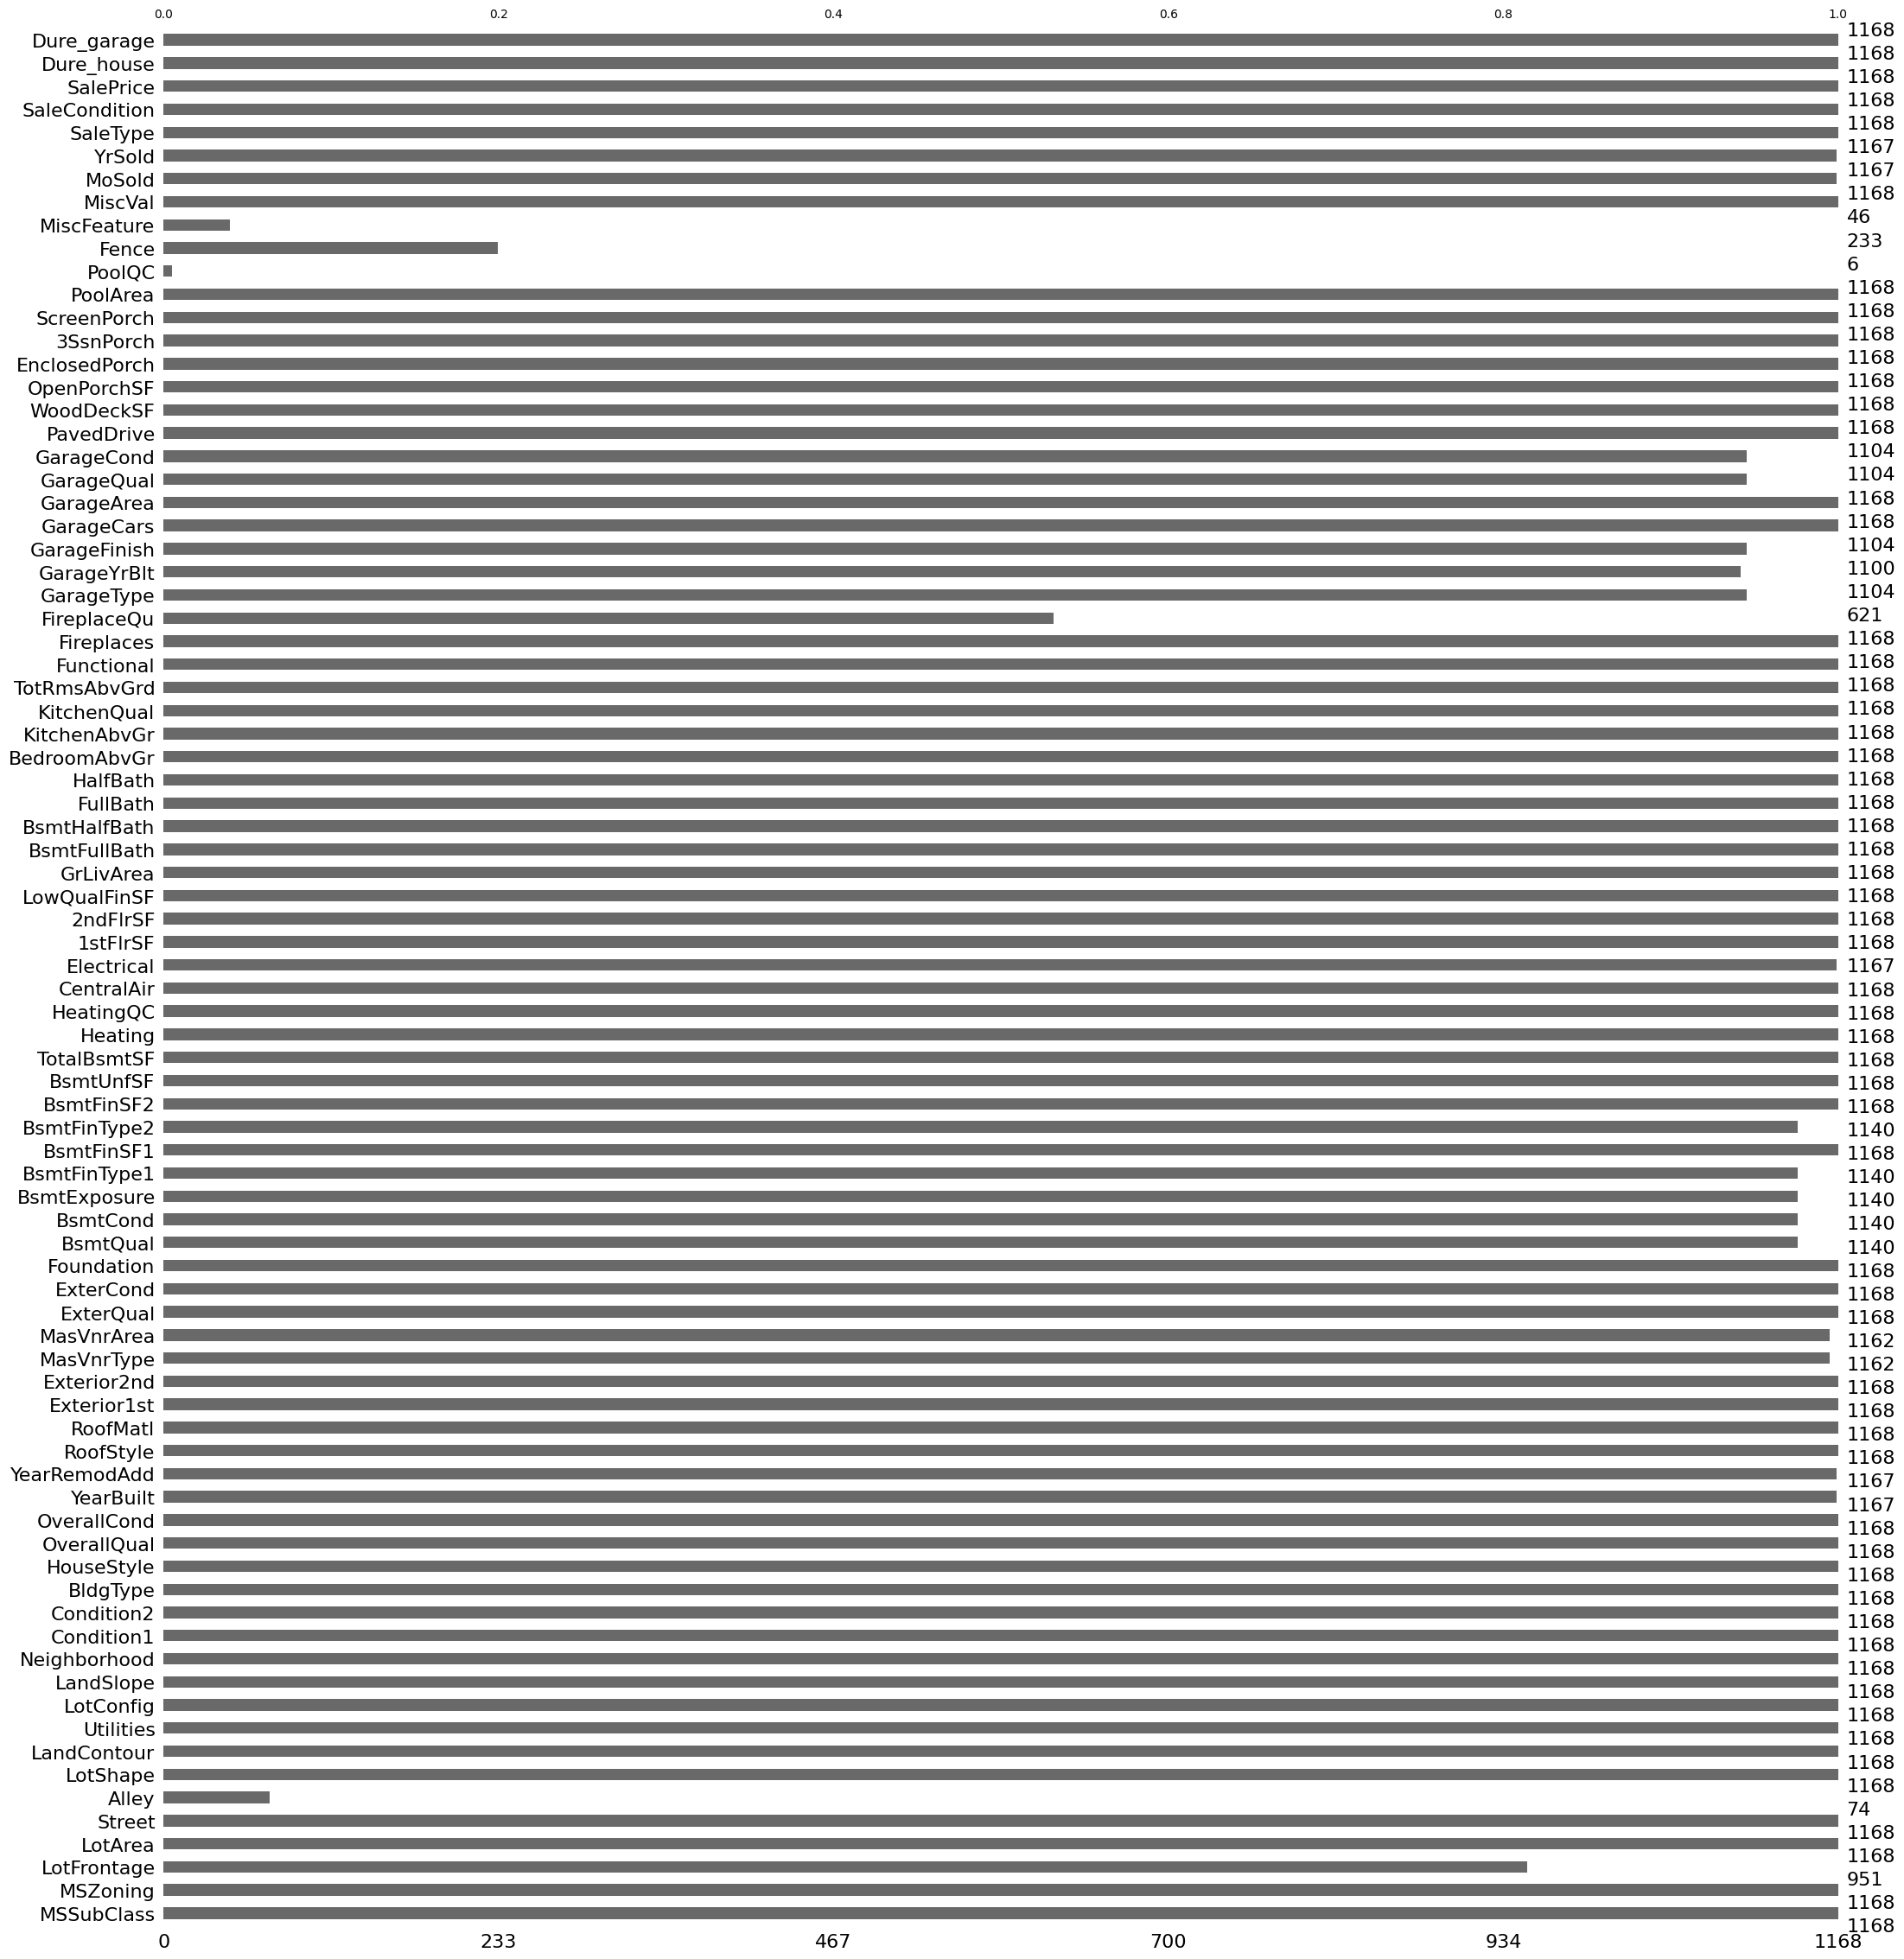

In [19]:
# Détection dees valeurs manquantes 
msno.bar(data_train,filter="top")

### Fausses valeurs manquantes 
Dans la base de données certaines variables ont la modalité 'NA' et donc à l'importation ces modalités ont été considéré comme valeurs manquantes par pandas au même titre que les vrais valeurs manquantes 'NA' présentes sur d'autres variables.

Dans cette partie 'ces fausses valeurs manquantes sont corrigées' en les remplacant juste par 'non appli' pour plus tard leurs donné du sens. Plus bas se fera le traitement des 'vrai valeurs manquantes'.

<Axes: >

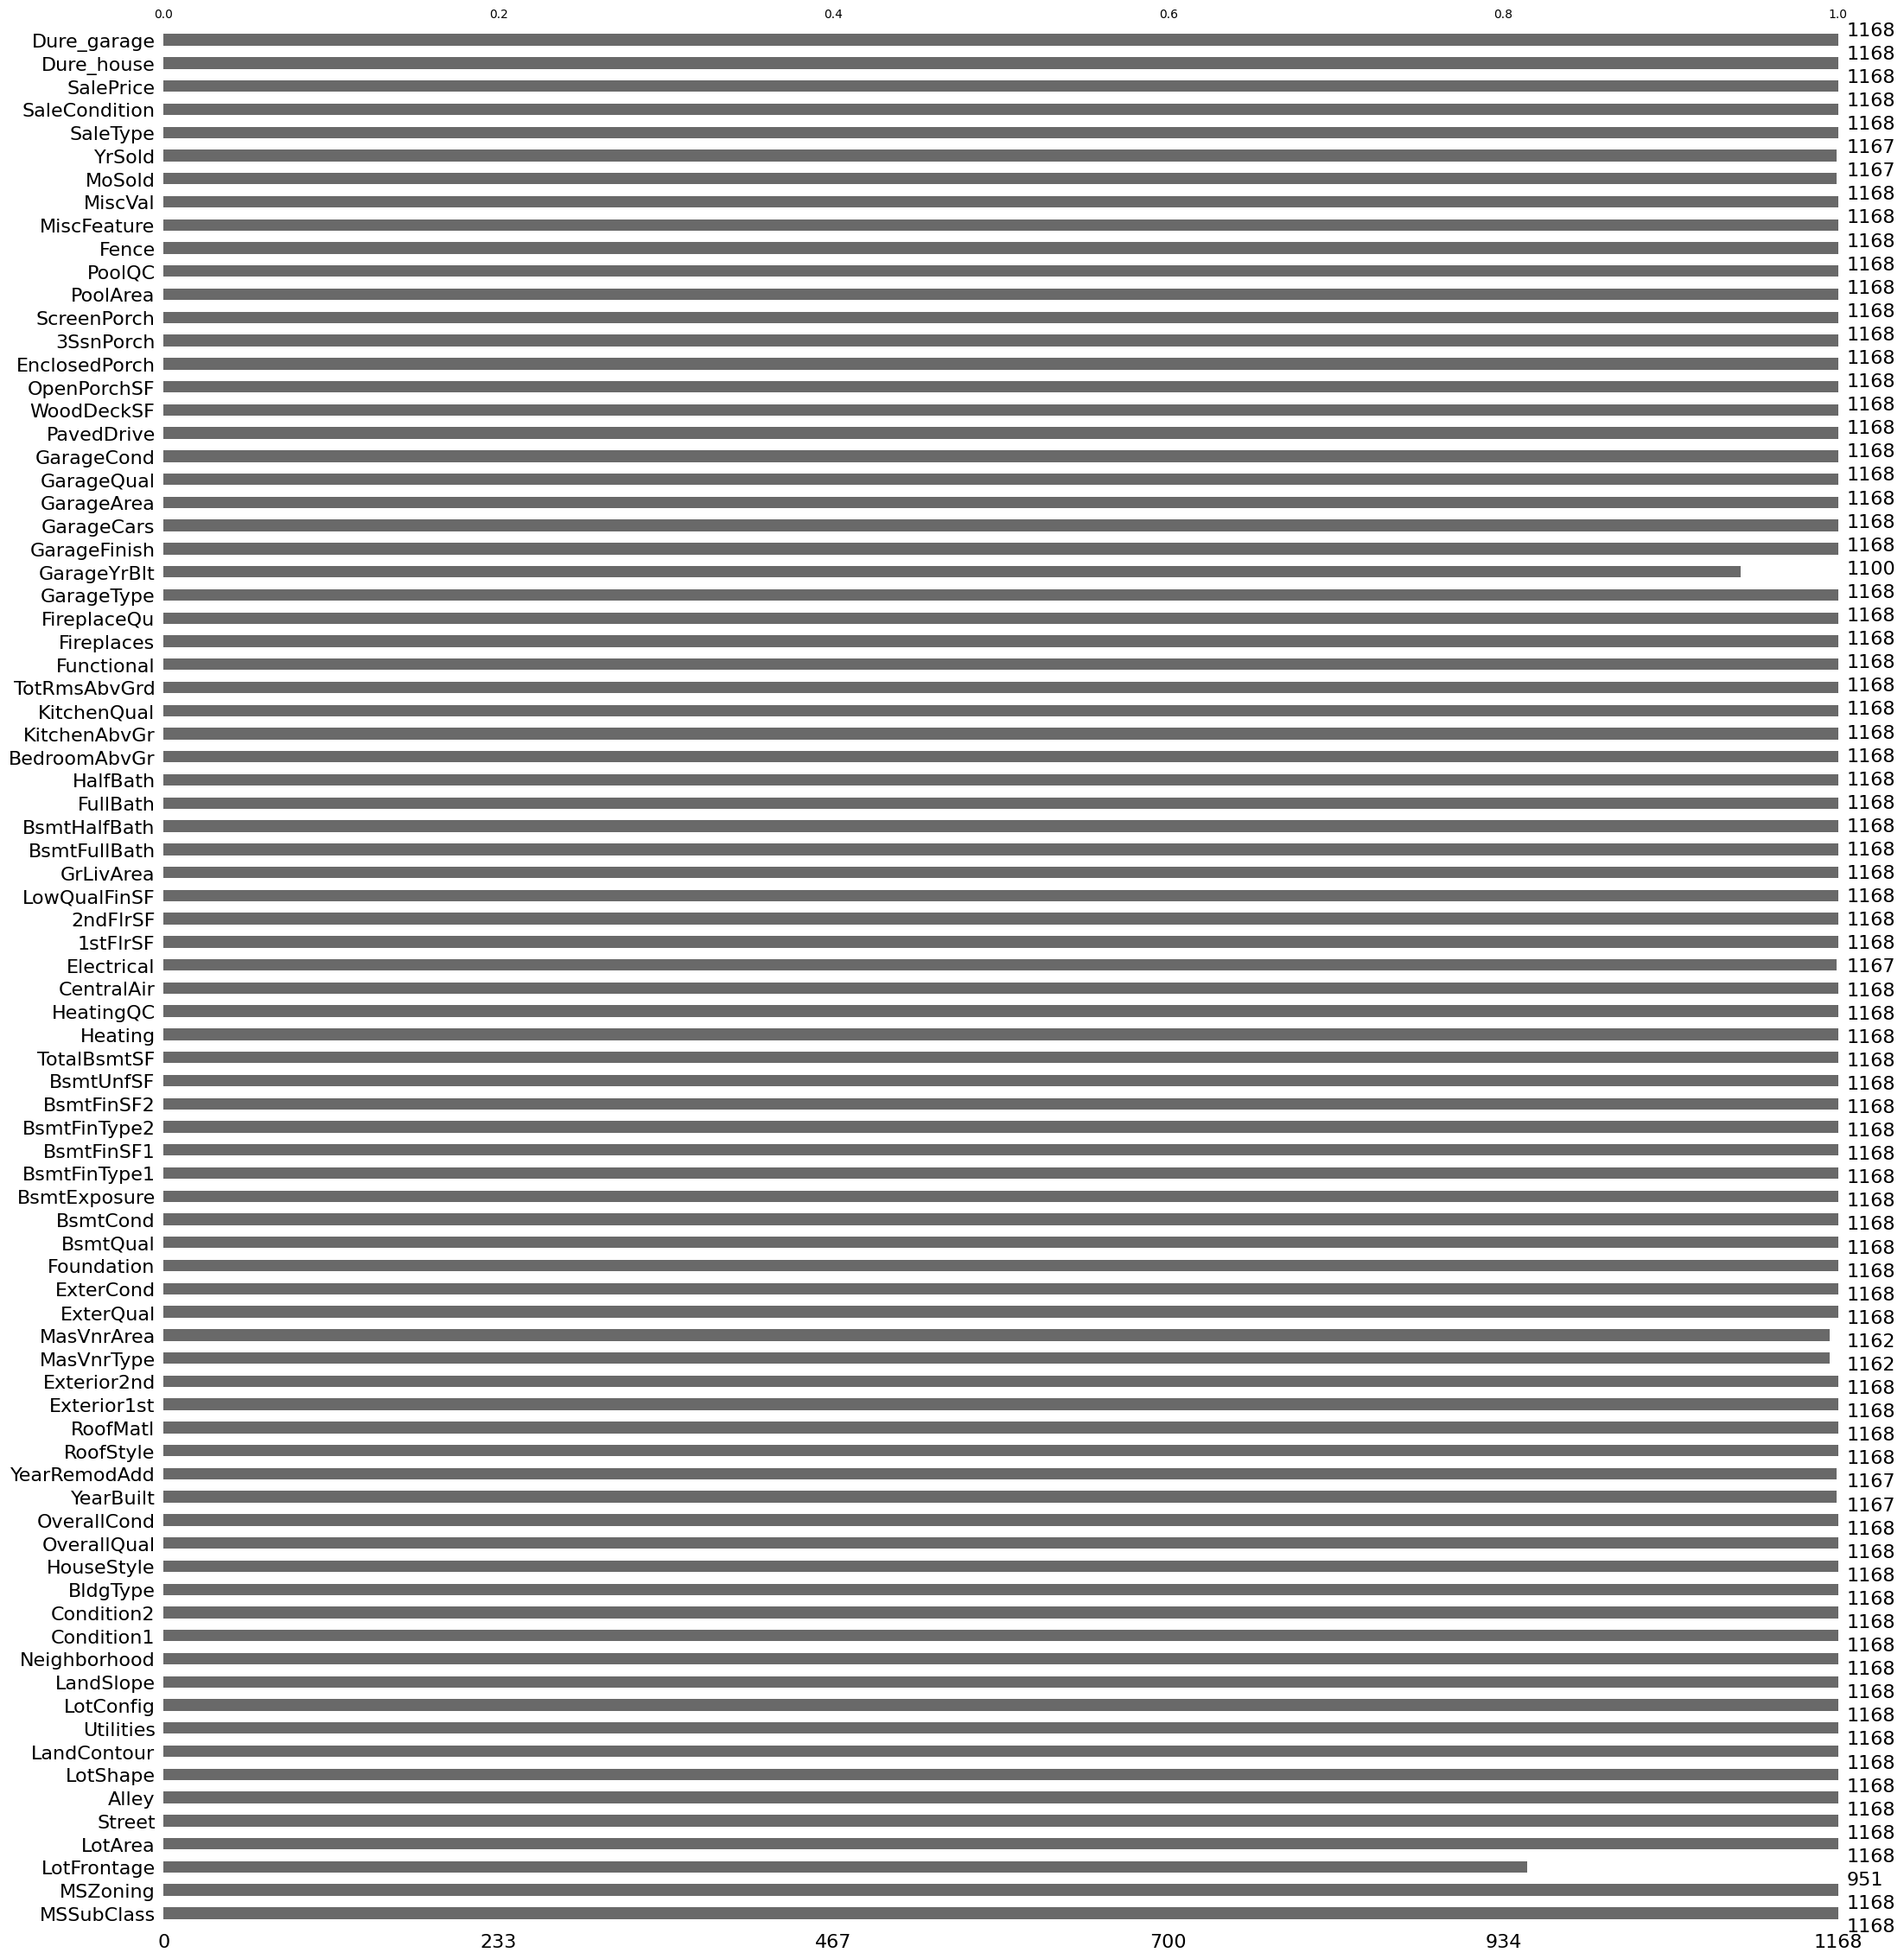

In [20]:
NA_fake_var = ["BsmtQual", "BsmtCond", "BsmtExposure",
               "BsmtFinType1", "BsmtFinType2",
               'GarageQual','GarageType', 'GarageFinish','GarageCond','PoolQC','Fence',
                'MiscFeature',
                'Alley','FireplaceQu' ]
data_train[NA_fake_var ] = data_train[NA_fake_var].fillna("nonappli")

# revisualisation des valeurs manquantes 
msno.bar(data_train,filter="top")

### Vrais valeurs manquantes

In [21]:
# Identification
NA_var = [col for col in data_train.columns if data_train[col].isna().any()]

# Nombre de valeurs manquantes pour les variables concernées
NA_var_counts = data_train.isna().sum()
print(NA_var_counts[NA_var_counts > 0])

LotFrontage     217
YearBuilt         1
YearRemodAdd      1
MasVnrType        6
MasVnrArea        6
Electrical        1
GarageYrBlt      68
MoSold            1
YrSold            1
dtype: int64


#### LotFrontage
Cette variable rensigne la longueur en pieds linéaires de la rue connectée à la propriété. On suppose que toutes les valeurs manquantes (217) indiquent l'absence de cette dernière soulignant alors un cas non souhaitable. A contrario, il est bon que cette longueur soit proche de 0. Par conséquent, aussi par insuffisante de métadonnées sur les critères de considération d'absence de la rue connectée, nous imputont ces valeurs manquantes par la valeur maximale de LotFrontage.

In [22]:
print(max(data_train["LotFrontage"]), min(data_train["LotFrontage"]))
data_train["LotFrontage"] = data_train["LotFrontage"].fillna(max(data_train["LotFrontage"]))

313.0 21.0


#### MasVnrArea et MasVnrType
MasVnrArea rensigne sur les maisons ne disposant pas de plaçage de maconnerie. Etant donnée que la situation pas de placage de maconnerie est déjà prise en compte (modalité None), nous allons remplacer les valeurs manquantes de MasVnrType par le mode et celle de MasVnrArea par la médiane des sur la valeur modale de MasVnrType. 

In [23]:
valeur_modale = data_train['MasVnrType'].mode()[0]

mediane_conditionnelle = data_train[data_train['MasVnrType'] == valeur_modale]['MasVnrArea'].median()

data_train['MasVnrType'] = data_train['MasVnrType'].fillna(valeur_modale)
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(mediane_conditionnelle)

#### Electrical
Cette variable qualitative ne contient qu'une seule valeur manquante. Sans grand risque de modifier la distribution de cette variable, nous remplacons cette valeur manquante par le mode.

In [24]:
data_train["Electric"] = data_train["Electrical"].fillna(data_train["Electrical"].mode()[0])

#### Dure_garage 
Une petite durée du garage est souhaitée. Nous donnons donc aux valeurs manquantes correspondante à l'absence de garage, la plus grade durée.


In [25]:
data_train["Dure_garage"] = data_train["Dure_garage"].fillna(max(data_train["Dure_garage"]))
#data_train["Dure_garage"] = pd.to_numeric(data_train["Dure_garage"])

#### Suppression des variables dates 
Les variables dates poriginal sont supprimés puisqu'elles sont significativement représentés par les variables durée

In [26]:
data_train = data_train.drop(dat, axis=1)

### Vérification des valeurs manquantes 

<Axes: >

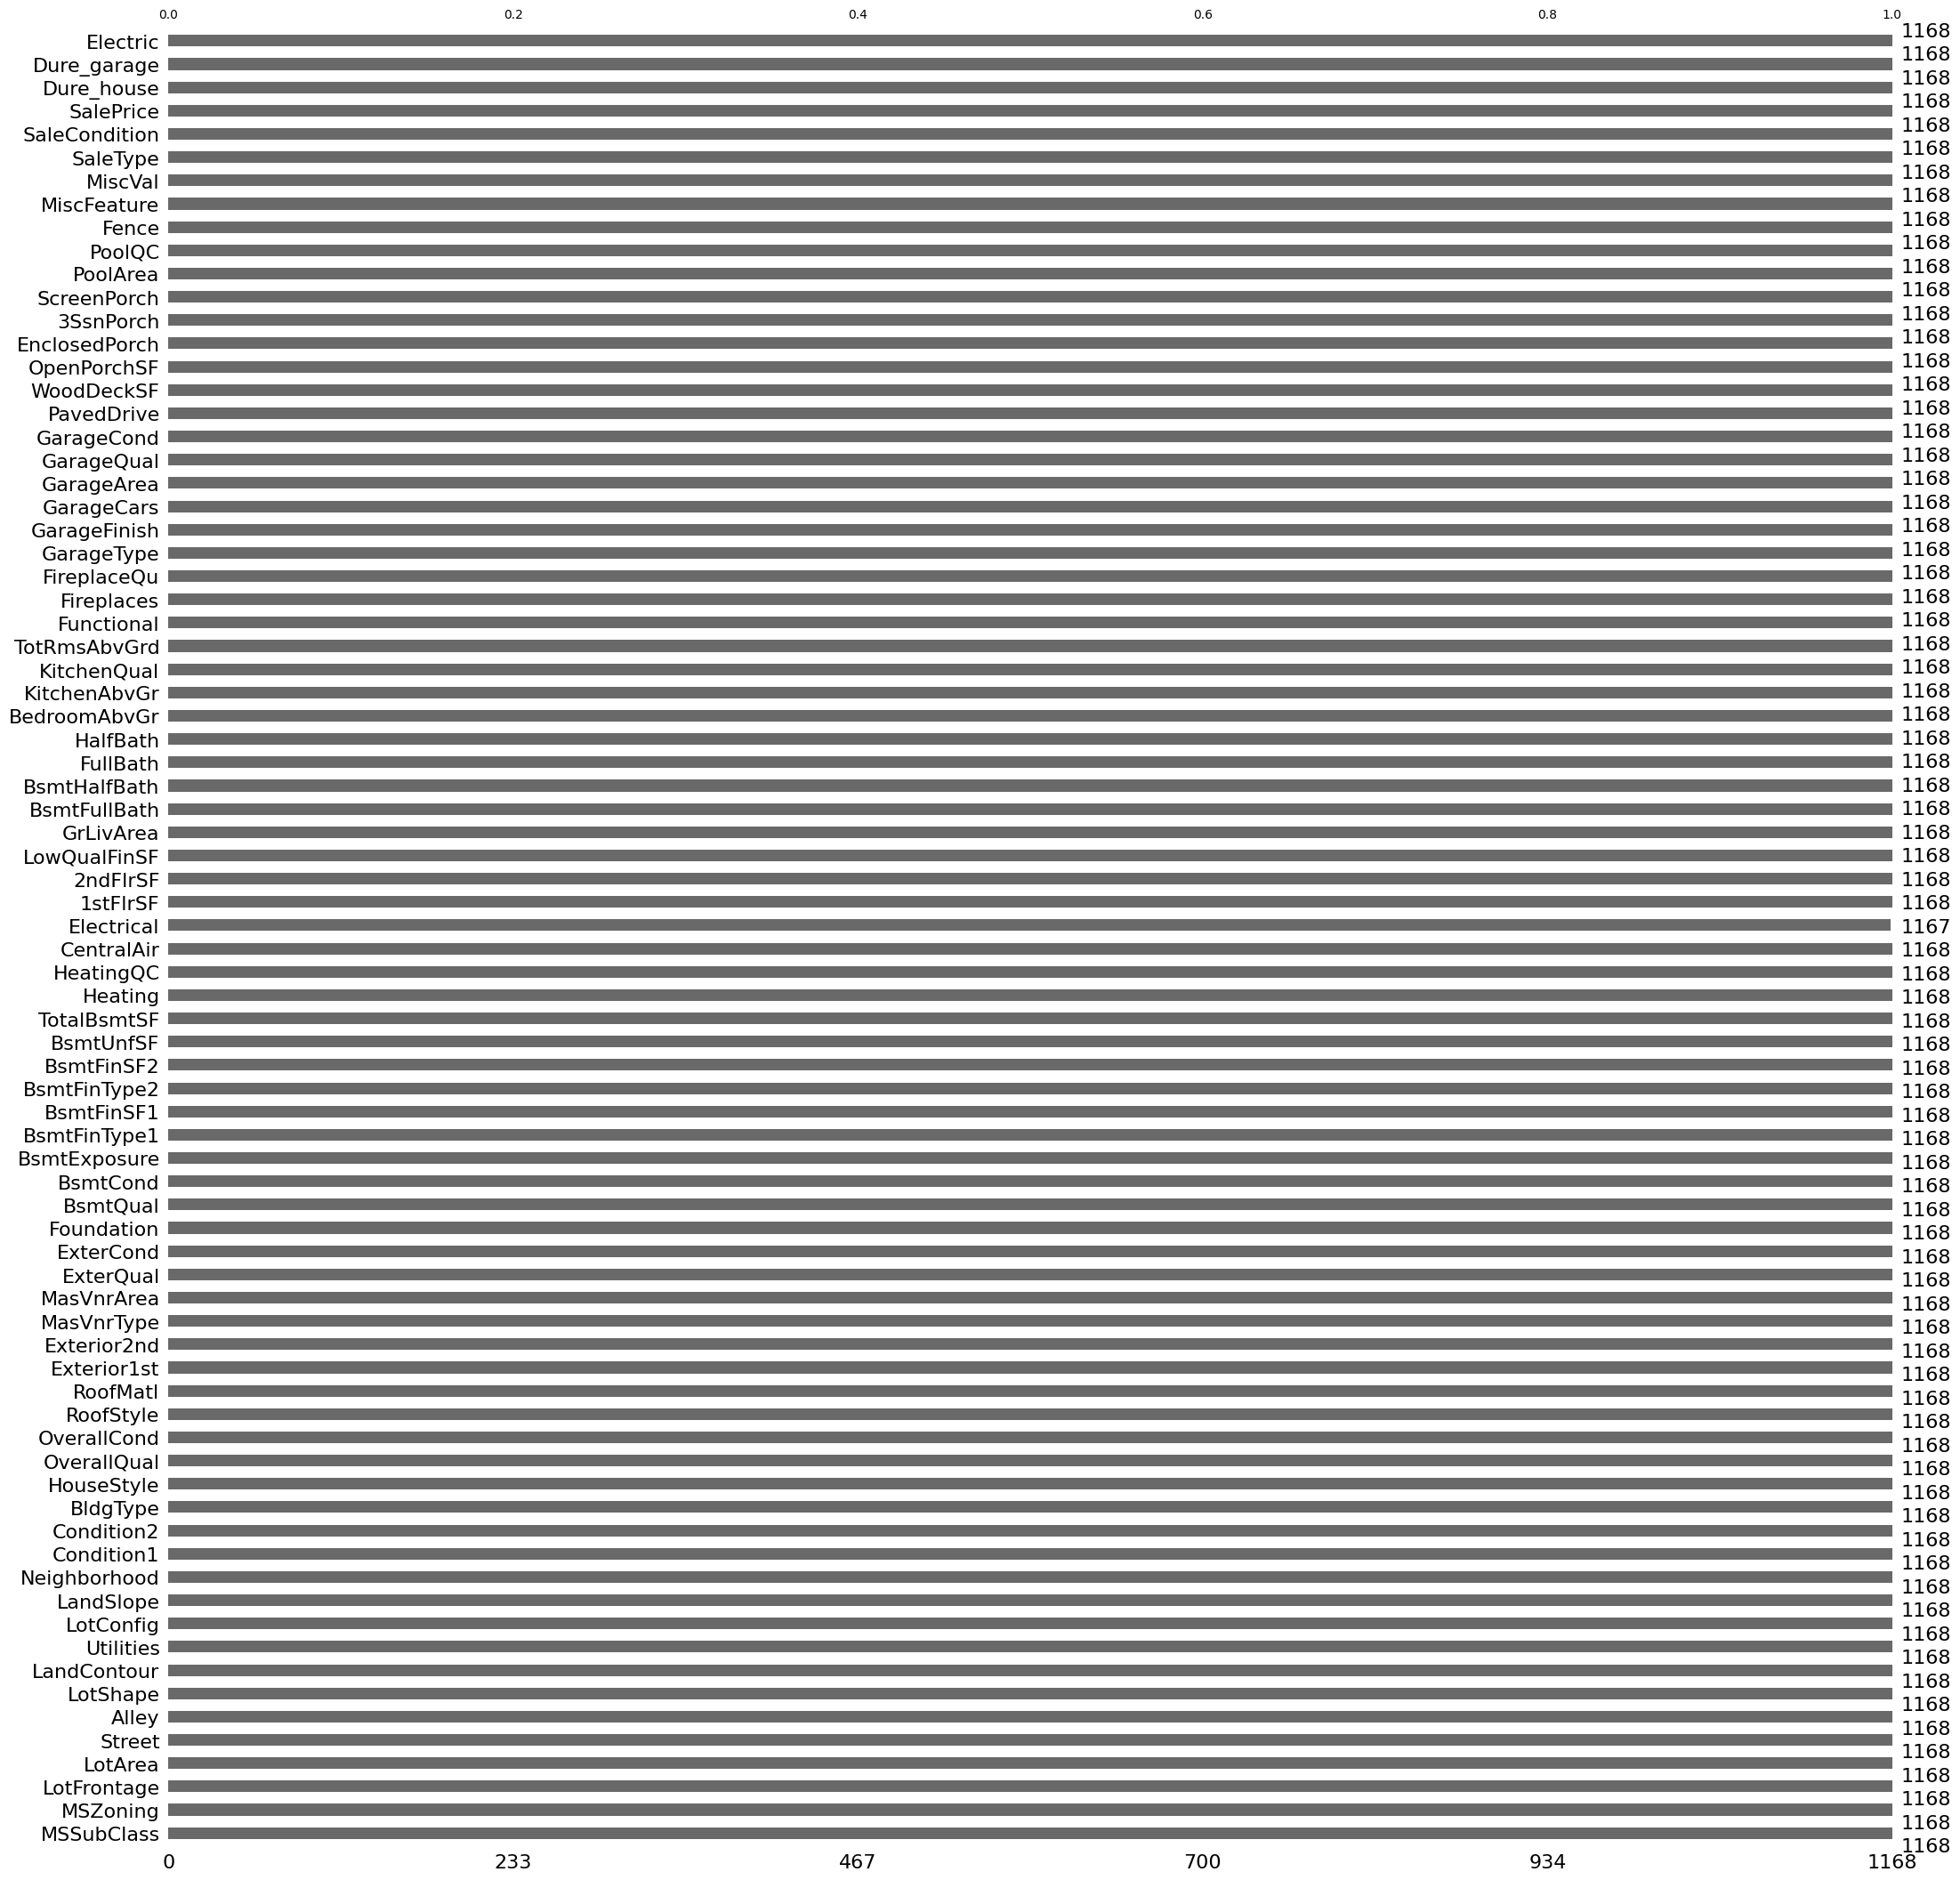

In [27]:
# revisualisation des valeurs manquantes 
msno.bar(data_train,filter="top")

## Sélection des variables 

### variables ayant un fort pouvoir prédictif avec PPscore

Dans cette partie les variables ayant un fort pouvoir prédictif donc succeeptible d'expliquer le prix de la maison son retenus. Au total 19 variables ont été retenus correspondant à un seuil du pouvoir prédictif de 0.08. Vu que la littérature ne donne pas des indications précises sur le choix du seuil, il est inspiré du choix des valeurs propres en analyse des données avec la méthode du coude.

In [28]:
def calculer_pouvoir_predictif(df, target_variable, seuil=0.1):
    """
    Calcule le pouvoir prédictif de toutes les variables par rapport à une variable cible.
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        Le DataFrame contenant les données
    
    target_variable : str
        Le nom de la variable cible à prédire
    
    seuil : float, optionnel
        Seuil minimal du pouvoir prédictif (défaut: 0.1)
    
    Retourne:
    ---------
    tuple : (pandas.DataFrame, list)
        - Un DataFrame avec les variables et leurs pouvoirs prédictifs
        - Une liste des variables ayant un pouvoir prédictif supérieur au seuil
    """
    # Créer une copie du DataFrame pour éviter les modifications
    df_prepare = df.copy()
    
    # Calculer les scores PPS pour toutes les variables
    pps_scores = []
    for col in df_prepare.columns:
        if col != target_variable:
            try:
                score = pps.score(df_prepare, col, target_variable)['ppscore']
                pps_scores.append({'variable': col, 'pouvoir_predictif': score})
            except:
                # Gérer les cas où le calcul du PPS échoue
                pass
    
    # Créer un DataFrame à partir des scores
    df_pouvoir_predictif = pd.DataFrame(pps_scores)
    
    # Trier par pouvoir prédictif décroissant
    df_pouvoir_predictif = df_pouvoir_predictif.sort_values('pouvoir_predictif', ascending=False)
    
    # Sélectionner les variables ayant un pouvoir prédictif supérieur au seuil
    variables_significatives = df_pouvoir_predictif[
        df_pouvoir_predictif['pouvoir_predictif'] > seuil
    ]['variable'].tolist()
    
    return df_pouvoir_predictif, variables_significatives

In [29]:
# la variable cible
target_variable = "SalePrice"

# Calculer le pouvoir prédictif

df_pouvoir_predictif, variables_significatives = calculer_pouvoir_predictif(
    data_train, 
    target_variable, 
    seuil=0.08
)

# Afficher le DataFrame des pouvoirs prédictifs
print("Tableau des pouvoirs prédictifs :")
print(df_pouvoir_predictif)

# Afficher les variables significatives
print("\nVariables avec un pouvoir prédictif significatif :")
print(variables_significatives)
print(len(variables_significatives))



Tableau des pouvoirs prédictifs :
        variable  pouvoir_predictif
16   OverallQual           0.426639
11  Neighborhood           0.328424
57    GarageCars           0.284824
27      BsmtQual           0.270481
50   KitchenQual           0.259987
..           ...                ...
19      RoofMatl           0.000000
52    Functional           0.000000
18     RoofStyle           0.000000
14      BldgType           0.000000
38    CentralAir           0.000000

[77 rows x 2 columns]

Variables avec un pouvoir prédictif significatif :
['OverallQual', 'Neighborhood', 'GarageCars', 'BsmtQual', 'KitchenQual', 'ExterQual', 'GarageArea', 'FullBath', 'GarageFinish', 'GarageType', 'Foundation', 'FireplaceQu', 'TotRmsAbvGrd', 'MSSubClass', 'HeatingQC', 'BsmtFinType1', 'Fireplaces', 'Exterior1st', 'Exterior2nd']
19


In [30]:
def visualiser_ppscore(df_pouvoir_predictif, top_n=15):
    """
    Visualise les PPS scores avec un graphique à barres horizontal.
    
    Paramètres:
    -----------
    df_pouvoir_predictif : pandas.DataFrame
        DataFrame contenant les variables et leurs pouvoirs prédictifs
    
    top_n : int, optionnel
        Nombre de variables à afficher (défaut: 15)
    """
    # Sélectionner les top N variables
    top_variables = df_pouvoir_predictif.head(top_n)
    
    # Créer le graphique
    plt.figure(figsize=(12, 8))
    
    # Graphique à barres horizontal avec palette de couleurs
    sns.barplot(
        x='pouvoir_predictif', 
        y='variable', 
        data=top_variables,
        palette='viridis'  # Palette de couleurs attrayante
    )
    
    plt.title('Top des Variables par Pouvoir Prédictif', fontsize=16)
    plt.xlabel('Predictive Power Score', fontsize=12)
    plt.ylabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21508\302567326.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


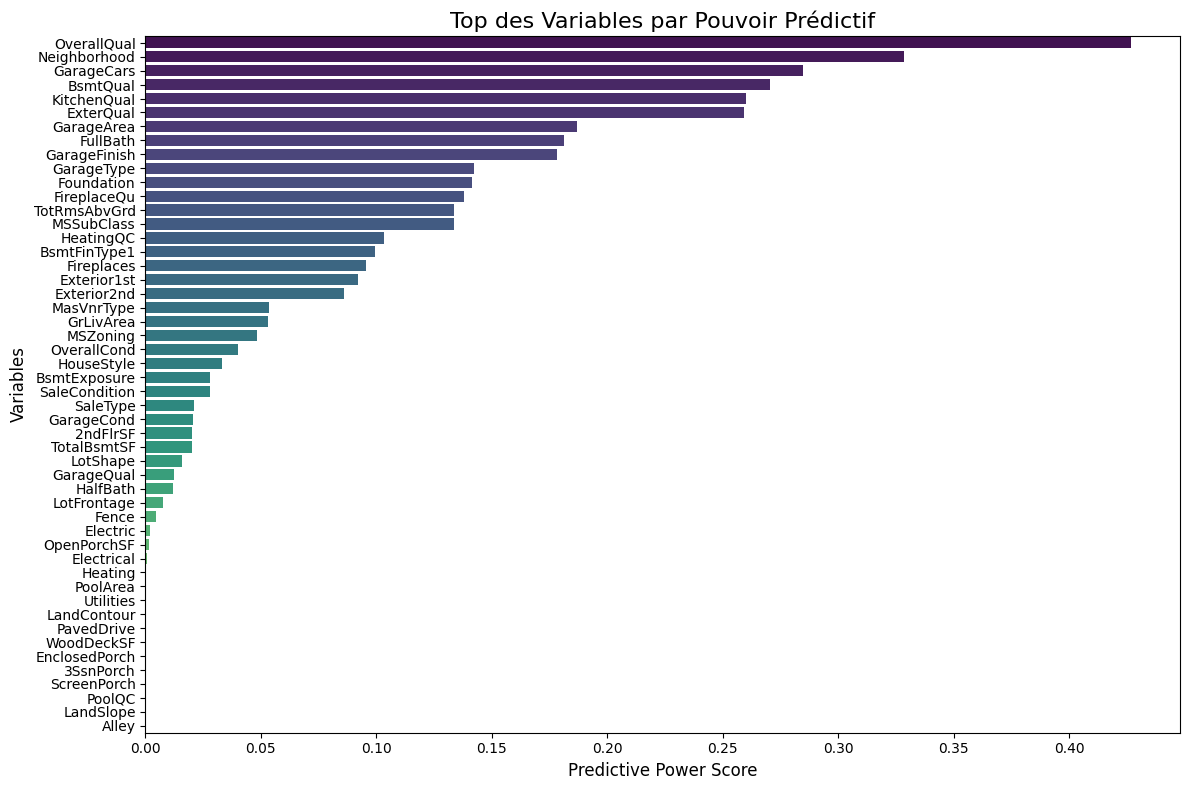

In [31]:
# affiche les 50 premires variables en termes de pouvoir prédictif
visualiser_ppscore(df_pouvoir_predictif, 50)

#### Type des variables sélectionnées
Identification des types des variables sélectionnées

In [32]:
o_num = list(set(o_num) & set(variables_significatives))
o_n_num = list(set(o_n_num) & set(variables_significatives))
n_o = list(set(n_o) & set(variables_significatives))
cont = list(set(cont) & set(variables_significatives))
cont.extend(['Dure_house', 'Dure_garage'])
boul = list(set(boul) & set(variables_significatives))

In [33]:
# Liste de listes avec des noms associés
listes = {
    "o_num": o_num,
    "o_n_num": o_n_num,
    "cont": cont, 
    "n_o": n_o, 
    "boul": boul, 
}

# Parcourir chaque liste par son nom et ses éléments
for nom_liste, liste in listes.items():
    print(f"Éléments de {nom_liste} :")
    print(liste)
    print()

Éléments de o_num :
['OverallQual', 'MSSubClass']

Éléments de o_n_num :
['GarageFinish', 'KitchenQual', 'BsmtFinType1', 'HeatingQC', 'BsmtQual', 'ExterQual']

Éléments de cont :
['GarageCars', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'Dure_house', 'Dure_garage']

Éléments de n_o :
['Neighborhood', 'Exterior1st', 'GarageType', 'Foundation', 'Exterior2nd']

Éléments de boul :
[]



### liaison de variables qualitatives

En utilisant le V de cramer les variables catégorielles fortement correlés sont supprimées au seuil de 0.5 (laison forte). Pour la selection, les variables ordinales sont préférés aux variables non ordinales le cas échéant (en vue des recadage) et aussi les variables ayant un meilleur pouvoir prédictif sont préférés.

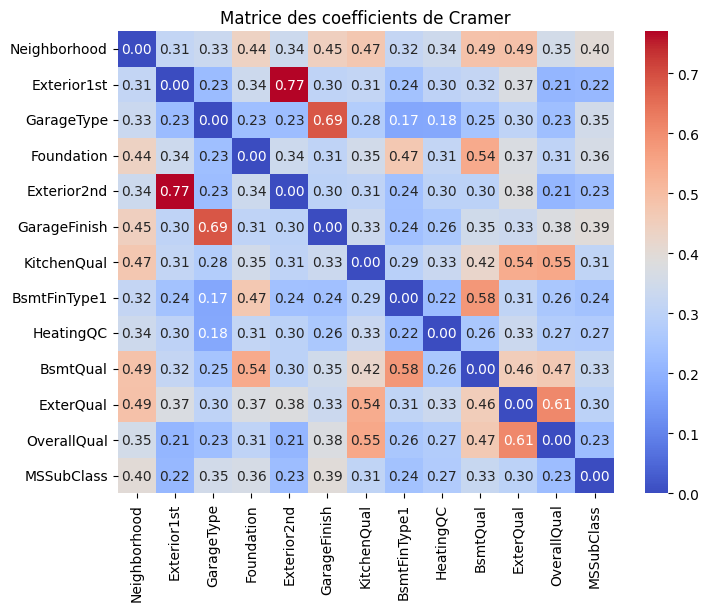

In [34]:
#Fonction pour calculer le coefficient de Cramér
def cramers_v(table):
    """Calculer le coefficient de Cramér pour une table de contingence"""
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    min_dim = min(table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

# Initialiser une matrice vide pour stocker les résultats
variables = n_o+o_n_num+o_num
n = len(variables)
cramers_matrix = pd.DataFrame(np.zeros((n, n)), index=variables, columns=variables)

# Remplir la matrice des coefficients de Cramér
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            table = pd.crosstab(data_train[var1], data_train[var2])
            cramers_matrix.loc[var1, var2] = cramers_v(table)

# Visualisation de la matrice avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matrice des coefficients de Cramer")
plt.show()

In [35]:

def test_liaison_qualitatives(df, variables):
    """
    Réalise des tests de liaison pour toutes les paires de variables qualitatives
    
    Paramètres :
    - df : DataFrame pandas
    - variables : liste des noms des variables à tester
    """
    resultats = {}
    
    # Tests pour chaque paire de variables
    for i in range(len(variables)):
        for j in range(i+1, len(variables)):
            var1, var2 = variables[i], variables[j]
            
            # Tableau de contingence
            contingence = pd.crosstab(df[var1], df[var2])
            
            # Test du Chi-deux
            chi2, p_value_chi2, ddl, freq_theoriques = stats.chi2_contingency(contingence)
            
            # V de Cramer
            n = contingence.sum().sum()
            min_dim = min(contingence.shape) - 1
            v_cramer = np.sqrt(chi2 / (n * min_dim))
        
            
            resultats[(var1, var2)] = {
                'Chi2': chi2,
                'V_Cramer': v_cramer
            }
    
    return resultats

In [36]:
resultats = test_liaison_qualitatives(data_train, n_o+o_n_num+o_num)

# Affichage des résultats
for (var1, var2), stats_test in resultats.items():
    if stats_test['V_Cramer'] > 0.5 :
        print(f"Liaison entre {var1} et {var2}")
        print(f"Chi2 : {stats_test['Chi2']:.2f}")
        print(f"V de Cramer : {stats_test['V_Cramer']:.2f}")
   

Liaison entre Exterior1st et Exterior2nd
Chi2 : 9679.74
V de Cramer : 0.77
Liaison entre GarageType et GarageFinish
Chi2 : 1659.20
V de Cramer : 0.69
Liaison entre Foundation et BsmtQual
Chi2 : 1375.74
V de Cramer : 0.54
Liaison entre KitchenQual et ExterQual
Chi2 : 1016.35
V de Cramer : 0.54
Liaison entre KitchenQual et OverallQual
Chi2 : 1056.24
V de Cramer : 0.55
Liaison entre BsmtFinType1 et BsmtQual
Chi2 : 1575.68
V de Cramer : 0.58
Liaison entre ExterQual et OverallQual
Chi2 : 1302.75
V de Cramer : 0.61


#### suppression des variables liés

In [37]:
o_n_num_s = ["BsmtFinType1", "KitchenQual","ExterQual"]
n_o_s = ["Exterior2nd", "Foundation","GarageType"]
for o in o_n_num_s : 
    o_n_num.remove(o)
for o in n_o_s : 
    n_o.remove(o)


### liaison de variables quantitatives
Dans cette partie les variables fortement correclés ( seuil = 0.8) sont supprimés. la préférence à la retention est accordés à la variable aaynt le meilleur pouvoir prédictif

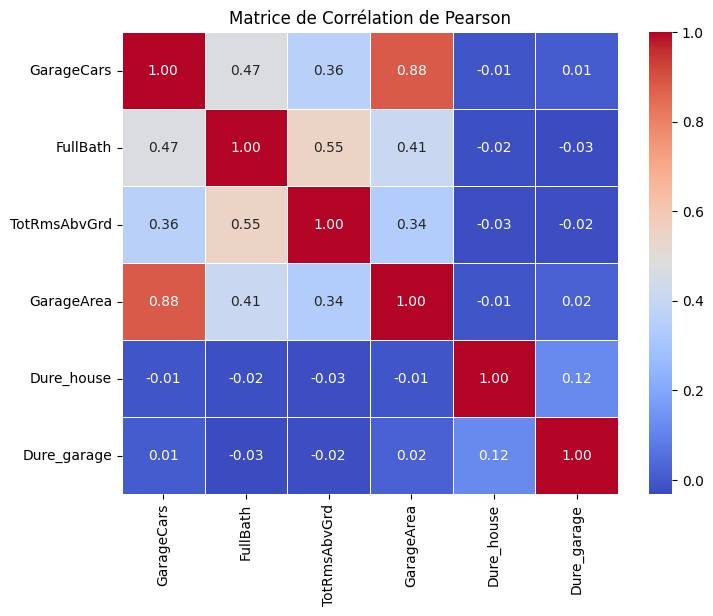

Variables ayant une corrélation supérieure à 0.7 :

              GarageCars  FullBath  TotRmsAbvGrd  GarageArea  Dure_house  \
GarageCars       1.00000       NaN           NaN     0.88255         NaN   
FullBath             NaN       1.0           NaN         NaN         NaN   
TotRmsAbvGrd         NaN       NaN           1.0         NaN         NaN   
GarageArea       0.88255       NaN           NaN     1.00000         NaN   
Dure_house           NaN       NaN           NaN         NaN         1.0   
Dure_garage          NaN       NaN           NaN         NaN         NaN   

              Dure_garage  
GarageCars            NaN  
FullBath              NaN  
TotRmsAbvGrd          NaN  
GarageArea            NaN  
Dure_house            NaN  
Dure_garage           1.0  


In [38]:

# Étape 1 : Calculer la matrice de corrélation de Pearson
correlation_matrix = data_train[cont].corr()

# Étape 2 : Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation de Pearson")
plt.show()

# Étape 3 : Extraire les variables ayant un coefficient de corrélation supérieur à un seuil 
threshold = 0.7
high_correlation = correlation_matrix[correlation_matrix > threshold]

# Afficher les variables fortement corrélées
print("Variables ayant une corrélation supérieure à", threshold, ":\n")
print(high_correlation)


In [39]:
cont.remove("GarageArea")

### Liste finale des variables retenues 
Au final 12 variables ont été retenues

In [40]:
# Liste de listes avec des noms associés
listes = {
    "o_num": o_num,
    "o_n_num": o_n_num,
    "cont": cont, 
    "n_o": n_o, 
    "boul": boul, 
}

# Parcourir chaque liste par son nom et ses éléments
for nom_liste, liste in listes.items():
    print(f"Éléments de {nom_liste} :")
    print(liste)
    print()

Éléments de o_num :
['OverallQual', 'MSSubClass']

Éléments de o_n_num :
['GarageFinish', 'HeatingQC', 'BsmtQual']

Éléments de cont :
['GarageCars', 'FullBath', 'TotRmsAbvGrd', 'Dure_house', 'Dure_garage']

Éléments de n_o :
['Neighborhood', 'Exterior1st']

Éléments de boul :
[]



## Recodage des variables 
Dans cette partie tout les variables catégorielles sont recodés au besoin (ordinales non numériqes et non ordinal)

### recodage des variables ordinales non numériques

In [41]:
def label_encode_ordinal(column):
    """
    Fonction pour effectuer un label encoding ordonné pour les variables catégorielles ordinales
    """
    
    # BsmtQual
    bsmtqual_order = {
        'nonappli': 0,   # Pas de sous-sol
        'Po': 1,         # Mauvais
        'Fa': 2,         # Médiocre
        'TA': 3,         # Typique
        'Gd': 4,         # Bon
        'Ex': 5          # Excellent
    }
    
    # HeatingQC
    heatingqc_order = {
        'Po': 0,   # Mauvais
        'Fa': 1,   # Médiocre
        'TA': 2,   # Moyen / Typique
        'Gd': 3,   # Bon
        'Ex': 4    # Excellent
    }
    
    
    # GarageFinish
    garagefinish_order = {
        'nonappli': 0,   # Pas de garage
        'Unf': 1,        # Non fini
        'RFn': 2,        # Partiellement fini
        'Fin': 3         # Fini
    }
    
    # Dictionnaire des mappings
    ordinal_mappings = {
        'BsmtQual': bsmtqual_order,
        'HeatingQC': heatingqc_order,
        'GarageFinish': garagefinish_order
    }
    
    # Vérification et encodage
    if column.name in ordinal_mappings:
        mapping = ordinal_mappings[column.name]
        return column.map(mapping)
    else:
        return column



In [42]:
data_train[o_n_num] = data_train[o_n_num].apply(label_encode_ordinal)

### recodage des variables non ordinales 

La Visualisation des deux variables non ordinales peut donner des idées sur le recodage à faire. Par contre Pour le acs d'espèce, nous n'observons pas par exemple une certaine association entre les fréquences des modalités et le prix des maison. 
Par conséquent, la variable Neighborghood étant la variable la plus prédictive, nous faisons l'hypothès que les variation des prix moyen par modalités lui sont grandement attribuables et donc elle sera recodé avec le target encoding. 
Pour la variables Exteriort1st qui n'a pas un assez bon pouvoir prédictif, nous utilisons le frequency encoding, aussi en raison de de nombre élevé de modalités

In [43]:

def visualiser_variables_qualitatives(df, variables_qualitatives, variable_cible):
    # Nombre de variables à visualiser
    n_vars = len(variables_qualitatives)
    
    # Création d'une grille de subplots
    fig, axes = plt.subplots(nrows=n_vars, ncols=2, figsize=(20, 5*n_vars))
    
    # Parcourir chaque variable qualitative
    for i, variable in enumerate(variables_qualitatives):
        # Calculer les fréquences des modalités
        freq_modalites = df[variable].value_counts()
        
        # Subplot 1 : Diagramme à barres des fréquences
        freq_modalites.plot(kind='bar', ax=axes[i, 0], 
                             title=f'Fréquences de {variable}')
        axes[i, 0].set_xlabel('Modalités')
        axes[i, 0].set_ylabel('Fréquence')
        
        # Trier les modalités par fréquence décroissante
        ordre_modalites = freq_modalites.index.tolist()
        
        # Subplot 2 : Boxplot de la variable cible par modalité, trié par fréquence
        sns.boxplot(x=variable, y=variable_cible, data=df, 
                    order=ordre_modalites,
                    ax=axes[i, 1], 
                    palette='Set3')
        axes[i, 1].set_title(f'{variable_cible} par modalité de {variable}')
        axes[i, 1].set_xlabel(variable)
        axes[i, 1].set_ylabel(variable_cible)
        
        # Rotation des étiquettes pour éviter le chevauchement
        plt.setp(axes[i, 0].get_xticklabels(), rotation=45, ha='right')
        plt.setp(axes[i, 1].get_xticklabels(), rotation=45, ha='right')
    
    # Ajuster l'espacement entre les subplots
    plt.tight_layout()
    
    # Afficher la figure
    plt.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21508\2588813440.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y=variable_cible, data=df,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21508\2588813440.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=variable, y=variable_cible, data=df,


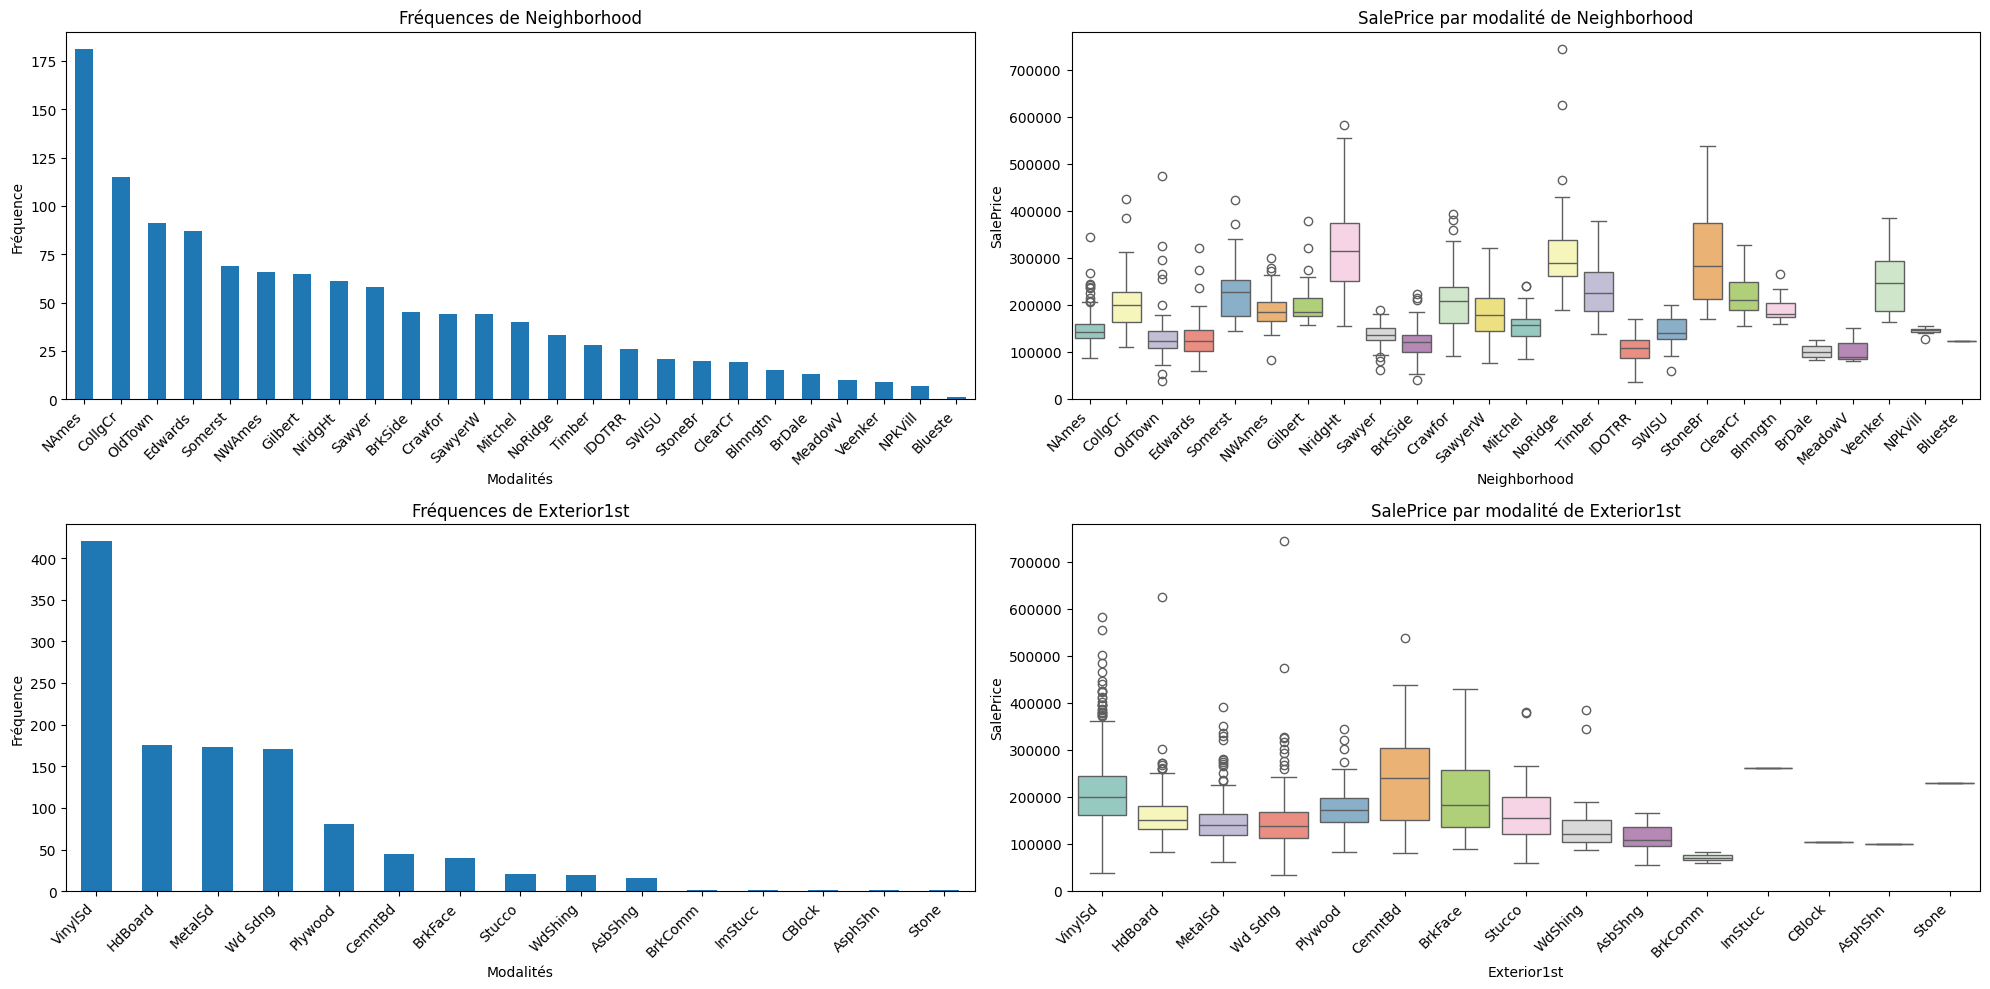

In [44]:
visualiser_variables_qualitatives(data_train, 
                                  n_o, 
                                  variable_cible='SalePrice')

#### Variable Neighborhood
Cette variable étant celle qui a le meilleur pouvoir prédictif, nous supposons que les variables de prix (moyenne) par modalité de cette dernière lui sont en grandes partie attribuable. En conséquence, elle sera recodée avec le target encoding.

In [45]:
# Calcul de la moyenne de la variable cible pour chaque catégorie de 'Pays'
mean_target = data_train.groupby('Neighborhood')['SalePrice'].mean()

# Target encoding : remplacer chaque catégorie de 'Pays' par la moyenne correspondante
data_train['Neighborhood'] = data_train['Neighborhood'].map(mean_target)

#### Variables Exterior1st
recodée avec le frequency encoding

In [46]:
freq_map = data_train['Exterior1st'].value_counts(normalize=True).to_dict()

# Créer la colonne encodée  
data_train['Exterior1st'] = data_train['Exterior1st'].map(freq_map)

## Standardisation

Afin d'éviter que l'échelle des données impact les performance des modèles, nous standardisons les variables continues

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Appliquer le scaler aux colonnes numériques uniquement
data_train[cont] = scaler.fit_transform(data_train[cont])
    

In [48]:
va = n_o + o_num + o_n_num + cont 

# __Création du pipeline__ 

Après avoir choisies les variables déterminantes pour notre modèle et vu les traitement qu'elles nécessitent, nous les automatisons sur les données du train à l'aide d'un pipeline qui sauvegadera les poids et les repliquera sur les données de test

## Définition des variables utiles por le traitement

In [49]:
o_num = ['MSSubClass', 'OverallQual']

o_n_num = ['GarageFinish', 'HeatingQC', 'BsmtQual']

cont = ['TotRmsAbvGrd', 'FullBath', 'GarageCars']

n_o = ['Exterior1st', 'Neighborhood']

dat = ['YrSold', 'YearRemodAdd','GarageYrBlt' ]
cible = ['SalePrice']
NA_fake_var = ['GarageFinish', 'BsmtQual']

## importation des données 

In [50]:
data_file_path = os.path.join(dirs['data_dir'], 'train.csv')
data = pd.read_csv(data_file_path, na_values=['NA', 'N/A', 'null', ''],keep_default_na=False)
data = data [o_num+o_n_num+cont+n_o+dat+cible]
X_train, X_test, y_train, y_test = prepare_data(data)

In [51]:
ytrain_file_path = os.path.join(dirs['output_dir'], 'ytrain.csv')
y_train.to_csv(ytrain_file_path, index=False)
ytest_file_path = os.path.join(dirs['output_dir'], 'ytest.csv')
y_test.to_csv(ytest_file_path, index=False)

## Définition du pipeline

In [314]:
### final intégré 5
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

# Variables finales souhaitées
FINAL_COLUMNS = [
    'OverallQual', 'HeatingQC', 'MSSubClass', 'BsmtQual', 'GarageFinish',
    'Neighborhood', 'Exterior1st', 'GarageCars', 'FullBath', 'Dure_house',
    'TotRmsAbvGrd', 'Dure_garage'
]

class DurationCalculator(BaseEstimator, TransformerMixin):
    """Calcule et traite les durées"""
    def __init__(self):
        self.max_dure_garage = None
        
    def fit(self, X, y=None):
        X = pd.DataFrame(X).copy()
        # Calcul des durées
        X['Dure_house'] = pd.to_numeric(X['YrSold'] - X['YearRemodAdd'])
        X['Dure_garage'] = pd.to_numeric(X['YrSold'] - X['GarageYrBlt'])
        # Stocker la valeur max pour Dure_garage
        self.max_dure_garage = X['Dure_garage'].max()
        return self
        
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        # Calcul des durées
        X['Dure_house'] = pd.to_numeric(X['YrSold'] - X['YearRemodAdd'])
        X['Dure_garage'] = pd.to_numeric(X['YrSold'] - X['GarageYrBlt'])
        # Gestion des valeurs manquantes
        X['Dure_garage'] = X['Dure_garage'].fillna(self.max_dure_garage)
        return X

class EnhancedOrdinalEncoder(BaseEstimator, TransformerMixin):
    """Encode les variables ordinales avec gestion des valeurs manquantes"""
    def __init__(self):
        self.ordinal_mappings = {
            'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
            'HeatingQC': {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
            'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
        }
        self.columns = ['BsmtQual', 'HeatingQC', 'GarageFinish']
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col in self.columns:
            X[col] = X[col].fillna('None')
            X[col] = X[col].map(self.ordinal_mappings[col]).astype(float)
        return X[self.columns]

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    """Encode les variables catégorielles par fréquence"""
    def __init__(self):
        self.freq_maps = {}
        self.columns = ['Exterior1st', 'Neighborhood']
        
    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        for col in self.columns:
            self.freq_maps[col] = X[col].value_counts(normalize=True).to_dict()
        return self
        
    def transform(self, X):
        X = pd.DataFrame(X).copy()
        for col in self.columns:
            X[col] = X[col].map(self.freq_maps[col])
        return X[self.columns]

class DataFrameFormatter(BaseEstimator, TransformerMixin):
    """Formate les données en sortie et sélectionne les colonnes finales"""
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        # Récupérer les indices des colonnes dans le bon ordre
        all_features = (['BsmtQual', 'HeatingQC', 'GarageFinish'] +  # ordinal
                      ['Neighborhood', 'Exterior1st'] +               # categorical
                      ['GarageCars', 'FullBath', 'TotRmsAbvGrd'] +    # numeric standard
                      ['Dure_house', 'Dure_garage'] +                 # durées normalisées
                      ['OverallQual', 'MSSubClass'])                  # passthrough
        
        X_df = pd.DataFrame(X, columns=all_features)
        # Sélectionner les colonnes finales dans l'ordre souhaité
        return X_df[FINAL_COLUMNS]

def create_preprocessing_pipeline():
    # Variables pour chaque transformateur
    numeric_features = ['GarageCars', 'FullBath', 'TotRmsAbvGrd']
    durations = ['Dure_house', 'Dure_garage']
    passthrough_features = ['OverallQual', 'MSSubClass']
    
    preprocessing = Pipeline([
        ('duration_calculator', DurationCalculator()),
        ('column_transformer', ColumnTransformer([
            ('ordinal', EnhancedOrdinalEncoder(), ['BsmtQual', 'HeatingQC', 'GarageFinish']),
            ('categorical', FrequencyEncoder(), ['Neighborhood', 'Exterior1st']),
            ('numeric', MinMaxScaler(), numeric_features + durations),  # Normalisation des durées avec les autres variables numériques
            ('passthrough', 'passthrough', passthrough_features)
        ]))
    ])
    
    # Pipeline final
    return Pipeline([
        ('preprocessing', preprocessing),
        ('formatter', DataFrameFormatter())
    ])


## Utilisation du pipeline
Création du pipeline avec les données train et application sur les données test et sauvegarde des données traitées 

In [315]:
pipeline = create_preprocessing_pipeline()
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [316]:

train_file_path = os.path.join(dirs['output_dir'], 'xtrain_proces.csv')

X_train_transformed.to_csv(train_file_path, index=False)



In [317]:

test_file_path = os.path.join(dirs['output_dir'], 'xtest_proces.csv')

X_test_transformed.to_csv(test_file_path, index=False)

## sauvegarde du Pipeline

In [318]:
pipeline_file_path = os.path.join(dirs['pipeline_dir'], 'preprocessing_pipeline.joblib')
def save_pipeline(pipeline, filename=pipeline_file_path):
    import joblib
    joblib.dump(pipeline, filename)
    print(f"Pipeline sauvegardé dans {filename}")

save_pipeline(pipeline)

Pipeline sauvegardé dans c:\Users\LENOVO\Desktop\House_Price_Prediction\pipeline\preprocessing_pipeline.joblib


In [319]:
pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('duration_calculator', DurationCalculator()),
                                 ('column_transformer',
                                  ColumnTransformer(transformers=[('ordinal',
                                                                   EnhancedOrdinalEncoder(),
                                                                   ['BsmtQual',
                                                                    'HeatingQC',
                                                                    'GarageFinish']),
                                                                  ('categorical',
                                                                   FrequencyEncoder(),
                                                                   ['Neighborhood',
                                                                    'Exterior1st']),
                                                                  ('numeric',
                                                                   MinMaxScaler(),
                                                                   ['GarageCars',
                                                                    'FullBath',
                                                                    'TotRmsAbvGrd',
                                                                    'Dure_house',
                                                                    'Dure_garage']),
                                                                  ('passthrough',
                                                                   'passthrough',
                                                                   ['OverallQual',
                                                                    'MSSubClass'])]))])),
                ('formatter', DataFrameFormatter())])